<a href="https://colab.research.google.com/github/ayeshinikulathunga/Ayeshini-DS-portfolio/blob/main/Object_Detection_app/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Detection

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

Saving random.jpg to random.jpg
Uploaded: random.jpg


In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
results =model(file_name)
annotated = results[0].plot()


image 1/1 /content/random.jpg: 640x480 1 umbrella, 1 wine glass, 3 cups, 1 spoon, 1 cell phone, 1 book, 1 clock, 70.9ms
Speed: 14.2ms preprocess, 70.9ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 480)


(np.float64(-0.5), np.float64(735.5), np.float64(1039.5), np.float64(-0.5))

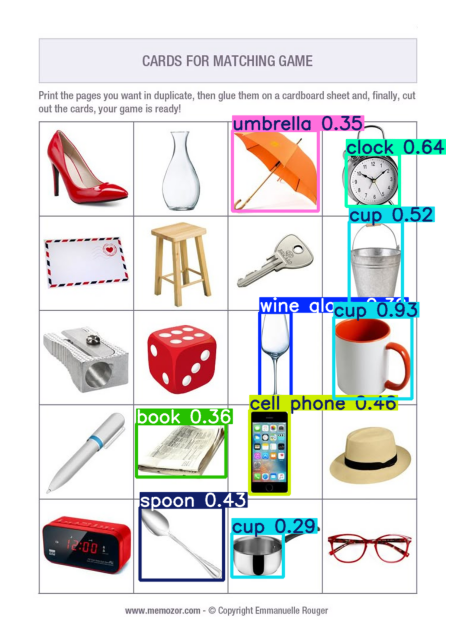

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

# Object Detection on Video

In [ ]:
uploaded = files.upload()
video_path =list(uploaded.keys())[0]
print("uploaded:",video_path)

Saving City traffic.mp4 to City traffic.mp4
uploaded: City traffic.mp4


In [ ]:
output_path = "output_detected.mp4"
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS) or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count=0
while True:
  ret,frame= cap.read()
  if not ret:
    break
  results=model(frame)
  annotated=results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count%100==0:
      print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)


0: 384x640 7 cars, 2 buss, 2 trucks, 49.0ms
Speed: 2.6ms preprocess, 49.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 1 truck, 6.3ms
Speed: 1.8ms preprocess, 6.3ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 1 truck, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 bus, 1 truck, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 1 truck, 7.0ms
Speed: 2.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Live Webcam Detection

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 person, 1 scissors, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


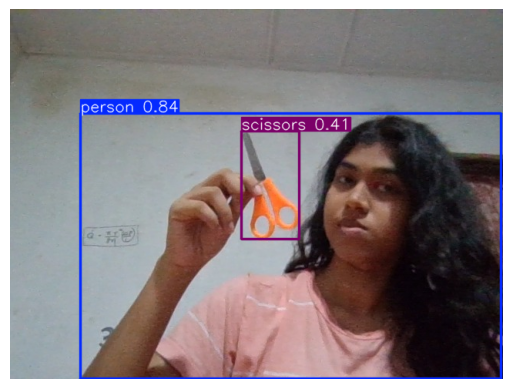

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model=YOLO('yolov8n.pt')

def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto(){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      //Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      //wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video,0,0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """
    data = output.eval_js(js)
    with open(filename,'wb') as f:
      f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:",filename)

results = model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Mini YOLO Training

In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO

In [ ]:
model = YOLO( 'yolov8n.pt')


In [ ]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  8000k      0 --:--:-- --:--:-- --:--:-- 16.9M
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dataset/coco128/images/train2017/000000000612.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dataset/coco128/images/train2017/000000000404.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dataset/coco128/images/train2017/000000000438.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace dataset/coco128/images/train2017/000000000389.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
data.yml  images  labels  LICENSE  README.txt


In [ ]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

Writing dataset/coco128.yaml


In [ ]:
model = YOLO("yolov8n.pt")
model.train(
    data="/content/dataset/coco128.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78420327dee0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,


image 1/1 /content/dataset/coco128/images/train2017/000000000049.jpg: 640x512 6 persons, 3 horses, 1 potted plant, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/YOLO_Training/yolo8n_custom10


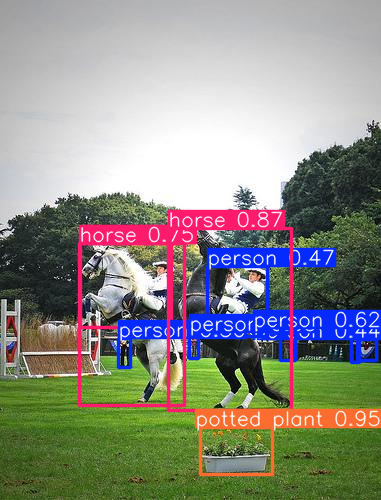

In [ ]:
results = model.predict("/content/dataset/coco128/images/train2017/000000000049.jpg",save=True,project="YOLO_Training",
    name="yolo8n_custom")
results[0].show()

# Simple Streamlit App

In [ ]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 130.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.

In [ ]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

st.set_page_config(page_title="Object Detection", layout="wide")

st.markdown(
    f"""
    <style>
    .stApp {{
        background-color: faf8f3;
        background-size: cover;
    }}

    /* Sidebar styling */
    section[data-testid="stSidebar"] {{
        background: #333333 !important;
        padding: 10px;
    }}

    section[data-testid="stSidebar"] > div {{
        background: #333333 !important;
    }}

    /* File uploader in sidebar - light background with dark text */
    section[data-testid="stSidebar"] div[data-testid="stFileUploader"] {{
        background: rgba(255, 255, 255, 0.9);
        backdrop-filter: blur(10px);
        border-radius: 12px;
        padding: 15px;
        border: 1px solid #ddd;
    }}

    section[data-testid="stSidebar"] div[data-testid="stFileUploader"] label p {{
        color: #1a1a1a !important;
    }}

    /* File uploader in main area - light background */
    div[data-testid="stFileUploader"] {{
        background: rgba(255, 255, 255, 0.95);
        backdrop-filter: blur(10px);
        border-radius: 12px;
        padding: 15px;
        border: 1px solid #ddd;
    }}

    div[data-testid="stFileUploader"] label p {{
        color: #1a1a1a !important;
    }}

    /* Drag and drop area text */
    div[data-testid="stFileUploader"] div[data-testid="stFileUploaderDropzone"] {{
        background: rgba(248, 248, 248, 0.98);
        border: 2px dashed #ccc;
    }}

    div[data-testid="stFileUploader"] div[data-testid="stFileUploaderDropzone"] span,
    div[data-testid="stFileUploader"] div[data-testid="stFileUploaderDropzone"] small,
    div[data-testid="stFileUploader"] div[data-testid="stFileUploaderDropzone"] button {{
        color: #1a1a1a !important;
    }}

    /* DataFrame styling */
    .stDataFrame {{
        background: rgba(255, 255, 255, 0.95);
        border-radius: 12px;
        padding: 10px;
        box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
    }}

    /* Selectbox styling */
    div[data-testid="stSelectbox"] label p {{
        color: #FFE4B5 !important;
    }}

    div[data-testid="stSelectbox"] div[role="combobox"] {{
        background: whitesmoke !important;
        color: #FFE4B5 !important;
        border: 1px solid #ddd !important;
    }}

    div[data-testid="stSelectbox"] div[role="combobox"] div {{
        background: #f8f8f8 !important;
        color: #FFE4B5 !important;
    }}

    div[data-testid="stSelectbox"] svg {{
        color: #FFE4B5 !important;
    }}

    /* Slider label */
    div[data-testid="stSlider"] label p {{
        color: #FFE4B5 !important;
    }}

    /* Radio button labels */
    div[data-testid="stRadio"] label p {{
        color: #FFE4B5 !important;
    }}

    /* General text styling */
    h1, h2, h3, h4, h5, h6 {{
        color: #FFE4B5 !important;
        font-weight: 600;
    }}

    p, div, span, label {{
        color: #FFE4B5 !important;
        font-weight: 400;
    }}

    .st-an {{
        background: #FFFDD0;
        backdrop-filter: blur(10px);
        border-radius: 12px;
    }}

    /* Success message */
    .stSuccess {{
        background: rgba(0, 200, 0, 0.1);
        color: #006600 !important;
    }}

    /* Warning message */
    .stWarning {{
        background: rgba(255, 193, 7, 0.1);
        color: #856404 !important;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

st.title("Object Detection")

uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1200], index=2)

@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
    return YOLO(weights_path)

# Load the model outside the function
model = load_model()

def save_uploaded_file(uploaded_file, suffix=""):
    suffix = suffix if suffix else Path(uploaded_file.name).suffix
    tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
    tf.write(uploaded_file.getbuffer())
    tf.flush()
    return tf.name

def annotate_and_table(results, model):
    res = results[0]
    try:
        plotted = res.plot()
        annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
    except Exception:
        annotated = res.orig_img if hasattr(res, "orig_img") else None

    detections = []
    try:
        boxes = res.boxes
        if boxes is not None and len(boxes) > 0:
            for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
                name = model.names[int(c)]
                detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
    except:
        detections = []

    return annotated, pd.DataFrame(detections)

weights_to_load = "yolov8n.pt"
if uploaded_weights:
    weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
    st.sidebar.success("Using uploaded weights")
    model = load_model(weights_to_load)

mode = st.radio("Select input", ("Image upload", "Video upload"))

if mode == "Image upload":
    uploaded = st.file_uploader("Upload image", type=["jpg", "jpeg", "png"])
    if uploaded:
        img = Image.open(uploaded).convert("RGB")
        st.image(img, caption="Input image", use_column_width=True)
        results = model.predict(np.array(img), conf=conf, imgsz=img_size)
        annotated, df = annotate_and_table(results, model)
        if annotated is not None:
            st.image(annotated, caption="Annotated", use_column_width=True)
        if not df.empty:
            st.dataframe(df, use_container_width=True)
        else:
            st.info("No objects detected")

elif mode == "Video upload":
    uploaded_vid = st.file_uploader("Upload video", type=["mp4", "avi", "mov", "mkv"])
    if uploaded_vid:
        tmp = save_uploaded_file(uploaded_vid)
        st.video(tmp)

        if st.button("Process Video"):
            with st.spinner("Processing video..."):
                cap = cv2.VideoCapture(tmp)
                fps = int(cap.get(cv2.CAP_PROP_FPS))
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

                # Ensure dimensions are even (required for H.264)
                if width % 2 != 0:
                    width -= 1
                if height % 2 != 0:
                    height -= 1

                # Create temporary output (using avi for reliability during processing)
                temp_output = tempfile.NamedTemporaryFile(delete=False, suffix='.avi').name
                fourcc = cv2.VideoWriter_fourcc(*'XVID')
                out = cv2.VideoWriter(temp_output, fourcc, fps, (width, height))

                # Progress bar
                progress_bar = st.progress(0)
                status_text = st.empty()
                frame_count = 0

                # Process each frame
                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Resize if needed
                    if frame.shape[1] != width or frame.shape[0] != height:
                        frame = cv2.resize(frame, (width, height))

                    # Run detection on frame
                    results = model.predict(frame, conf=conf, imgsz=img_size, verbose=False)

                    # Get annotated frame
                    annotated_frame = results[0].plot()

                    # Ensure correct size
                    if annotated_frame.shape[1] != width or annotated_frame.shape[0] != height:
                        annotated_frame = cv2.resize(annotated_frame, (width, height))

                    # Write to output
                    out.write(annotated_frame)

                    # Update progress
                    frame_count += 1
                    progress = min(frame_count / total_frames, 1.0)
                    progress_bar.progress(progress)
                    status_text.text(f"Processing frame {frame_count}/{total_frames}")

                cap.release()
                out.release()
                progress_bar.empty()

                # Convert to web-compatible MP4 using ffmpeg
                status_text.text("Converting to web-compatible format...")
                final_output = tempfile.NamedTemporaryFile(delete=False, suffix='.mp4').name

                try:
                    import subprocess
                    # Use ffmpeg to convert to H.264 MP4 (web-compatible)
                    result = subprocess.run([
                        'ffmpeg', '-y',  # Overwrite output
                        '-i', temp_output,  # Input file
                        '-c:v', 'libx264',  # H.264 video codec
                        '-preset', 'medium',  # Encoding speed
                        '-crf', '23',  # Quality (lower = better, 18-28 is reasonable)
                        '-pix_fmt', 'yuv420p',  # Pixel format (required for browser compatibility)
                        '-movflags', '+faststart',  # Enable streaming
                        final_output
                    ], check=True, capture_output=True, text=True)

                    status_text.empty()
                    st.success("Video processing complete!")

                    # Read and display the video
                    if os.path.exists(final_output) and os.path.getsize(final_output) > 0:
                        with open(final_output, 'rb') as f:
                            video_bytes = f.read()

                        # Display video
                        st.video(video_bytes)

                        # Offer download
                        st.download_button(
                            label="Download processed video",
                            data=video_bytes,
                            file_name="detected_video.mp4",
                            mime="video/mp4"
                        )
                    else:
                        st.error("Failed to create output video")

                    # Cleanup temp files
                    try:
                        os.unlink(temp_output)
                        os.unlink(final_output)
                    except:
                        pass

                except FileNotFoundError:
                    status_text.empty()
                    st.error("FFmpeg is not installed!")
                    st.info("""
                    **To fix this:**
                    1. For Streamlit Cloud: Create a `packages.txt` file with one line: `ffmpeg`
                    2. For local: Install ffmpeg:
                       - Windows: `choco install ffmpeg` or download from ffmpeg.org
                       - Mac: `brew install ffmpeg`
                       - Linux: `sudo apt-get install ffmpeg`
                    """)

                    # Provide download of the AVI file as fallback
                    with open(temp_output, 'rb') as f:
                        video_bytes = f.read()
                    st.download_button(
                        label="Download processed video (AVI format)",
                        data=video_bytes,
                        file_name="detected_video.avi",
                        mime="video/x-msvideo"
                    )

                except subprocess.CalledProcessError as e:
                    status_text.empty()
                    st.error(f"FFmpeg conversion failed: {e.stderr}")

                    # Provide download as fallback
                    with open(temp_output, 'rb') as f:
                        video_bytes = f.read()
                    st.download_button(
                        label="Download processed video (may not play in browser)",
                        data=video_bytes,
                        file_name="detected_video.avi",
                        mime="video/x-msvideo"
                    )

Overwriting app_streamlit.py


In [ ]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "34VjeVlseTZy8JlUhlJ4AbK32W7_7NSmQPWB3gCav3bUurB2w"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501)
print("Public URL:",public_url)

!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
   time.sleep(60)

Public URL: NgrokTunnel: "https://willodean-interrogational-holly.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.229.152:8501

2025-10-24 13:37:25.262 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_
  Stopping...


KeyboardInterrupt: 